# Session 6
Simone Mistrali

ID:2119119 

## Ex 1

The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t =10 s$) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during
consecutive time intervals is: 4, 1, 3, 1 and 3


Both in Uniform and in Jeffrey’s prior we have a Gamma posterior using some clever mathematical sostitution.

In [1]:
options(repr.plot.width=8, repr.plot.height=5)

### Uniform prior

[1] "The analytical mean is: 2.4 the numerical one is: 2.39999964294188"
[1] "The analytical variance is: 0.48 the numerical one is: 0.479997929044893"


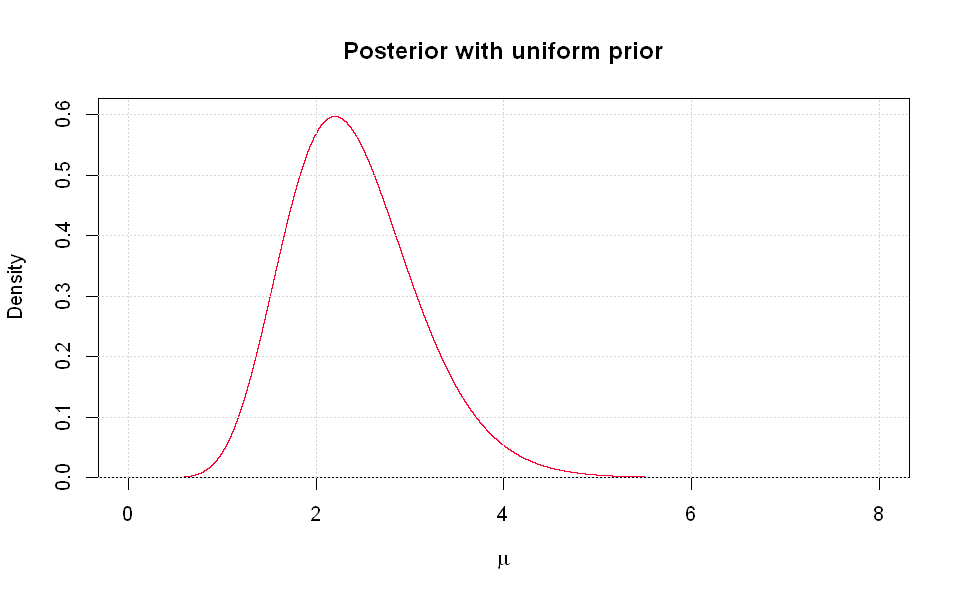

In [2]:
part <- c(4,1,3,1,3)

n <- length(part)
alpha <- sum(part)

samples <- 10000
mu  <- seq(0,8,by=1/samples)
dmu <- mu[2] - mu[1]

post <- dgamma(mu,alpha,n)
post.n <- post/(dmu*sum(post))
plot(mu, post.n, xaxs='r', yaxs='i', col='#FF0035', type='l', ylim=c(0,max(post.n)+0.03),
     , xlab=expression(mu),main="Posterior with uniform prior", 
     ylab='Density')
grid()
mean.unif.t <- alpha/n
var.unif.t <- alpha/(n**2)
mean.unif.num <- dmu*sum(mu*post.n)
var.unif.num <- dmu*sum(mu**2*post.n)- (dmu*sum(mu*post.n))**2
print(paste0("The analytical mean is: ",mean.unif.t," the numerical one is: ",mean.unif.num))
print(paste0("The analytical variance is: ",var.unif.t," the numerical one is: ",var.unif.num))

### Jeffrey’s prior

[1] "The analytical mean is: 2.5 the numerical one is: 2.49999934127785"
[1] "The analytical variance is: 0.5 the numerical one is: 0.499996245250369"


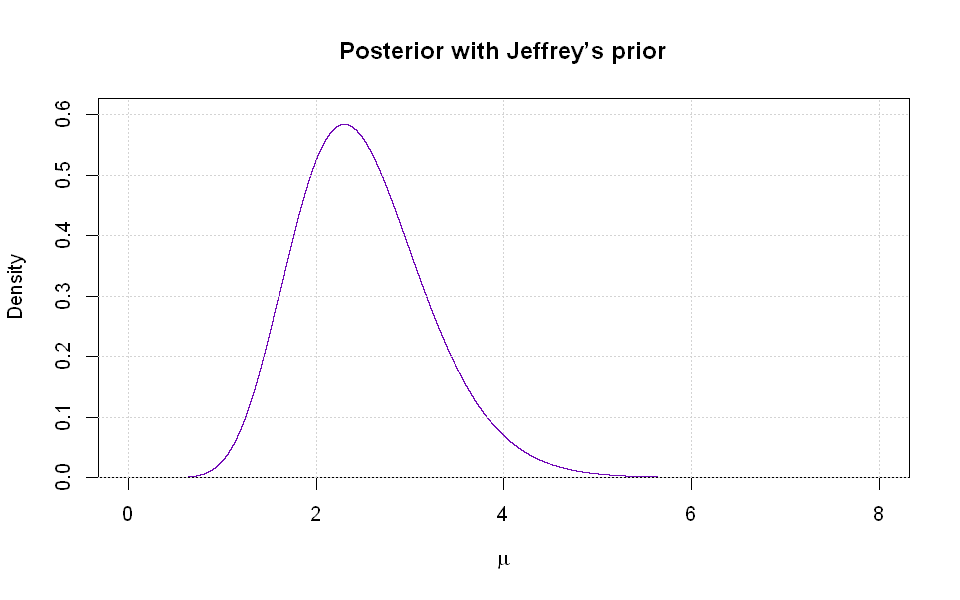

In [3]:
alpha.s <- alpha +.5 
post <- dgamma(mu,alpha.s,n)
postj.n <- post/(dmu*sum(post))
plot(mu, postj.n, xaxs='r', yaxs='i', col='#7209B7', type='l', ylim=c(0,max(post.n)+0.03),
     , xlab=expression(mu),main="Posterior with Jeffrey’s prior", 
     ylab='Density')
grid()
mean.j.t <- alpha.s/n
var.j.t <- alpha.s/(n**2)
mean.j.num <- dmu*sum(mu*postj.n)
var.j.num <- dmu*sum(mu**2*postj.n)- (dmu*sum(mu*postj.n))**2
print(paste0("The analytical mean is: ",mean.j.t," the numerical one is: ",mean.j.num))
print(paste0("The analytical variance is: ",var.j.t," the numerical one is: ",var.j.num))

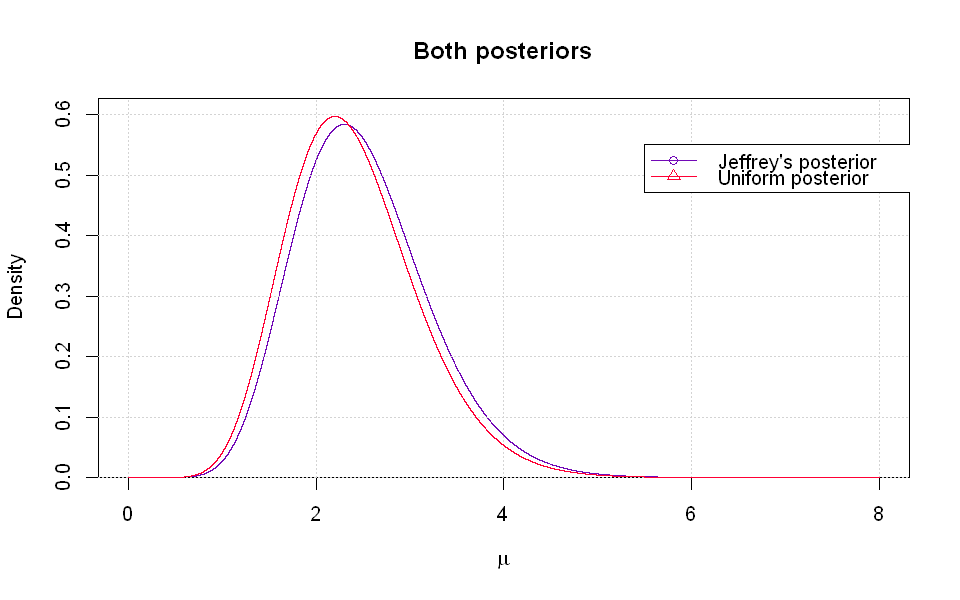

In [4]:

plot(mu, postj.n, xaxs='r', yaxs='i', col='#7209B7', type='l', ylim=c(0,max(post.n)+0.03),
     , xlab=expression(mu),main="Both posteriors", 
     ylab='Density')
grid()
lines(mu,post.n,col='#FF0035')
legend(x=5.5,y=.55,legend = c("Jeffrey's posterior","Uniform posterior"),
       col=c('#7209B7','#FF0035'),pch=c(1,2),cex=1,lty=c(1,1,1))


### Comparison of the "uniform" posterior with the normal distibution

In [5]:
conf.level = 0.95 
conf.level.func <- function(p,cumsum.area,conf.level) {
            for(i in 1:(length(cumsum.area)-1)){
                c1 <- (1-conf.level)/2
                c2 <- conf.level+(1-conf.level)/2
                if ( (cumsum.area[i+1]>= c1) & (cumsum.area[i] <= c1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= c2) & (cumsum.area[i] <= c2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

In [6]:
norm.unif <- dnorm(mu,mean = mean.unif.num, sd = sqrt(var.unif.num) )
area.unif <- dmu*cumsum(post.n)
area.norm <- dmu*cumsum(norm.unif)
x.prior.unif <- conf.level.func(mu,area.unif,conf.level)
x.norm       <- conf.level.func(mu,area.norm,conf.level)
print(paste0("Uniform Prior Conf interval of 95%: [", x.prior.unif[1],",", x.prior.unif[2],"]"))
print(paste0("Normal with Conf interval of 95%: [", x.norm[1],",",x.norm[2],"]"))

[1] "Uniform Prior Conf interval of 95%: [1.24005,3.93635]"
[1] "Normal with Conf interval of 95%: [1.04515,3.76105]"


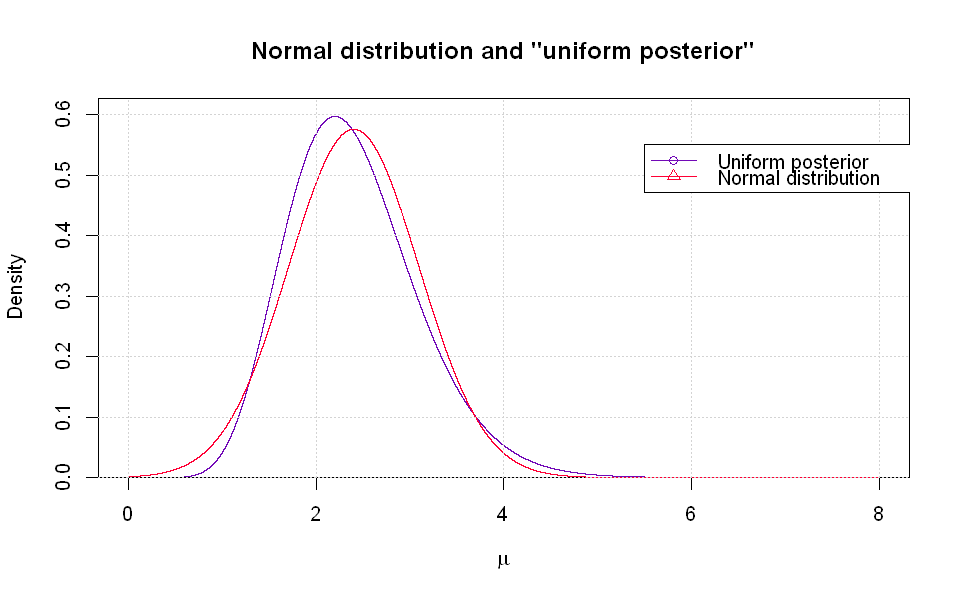

In [7]:
plot(mu, post.n, xaxs='r', yaxs='i', col='#7209B7', type='l', ylim=c(0,max(post.n)+0.03),
     , xlab=expression(mu),main='Normal distribution and "uniform posterior"', 
     ylab='Density')
lines(mu,norm.unif,col='#FF0035')
grid()
legend(x=5.5,y=.55,legend = c("Uniform posterior","Normal distribution"),
       col=c('#7209B7','#FF0035'),pch=c(1,2),cex=1,lty=c(1,1,1))


### Comparison of the Jeffrey's posterior with the normal distibution

In [8]:
norm.unif <- dnorm(mu,mean =mean.j.num , sd = sqrt(var.j.num) )
area.unif <- dmu*cumsum(postj.n)
area.norm <- dmu*cumsum(norm.unif)
x.prior.unif <- conf.level.func(mu,area.unif,conf.level)
x.norm       <- conf.level.func(mu,area.norm,conf.level)
print(paste0("Uniform Prior Conf interval of 95%: [", x.prior.unif[1],",", x.prior.unif[2],"]"))
print(paste0("Normal with Conf interval of 95%: [", x.norm[1],",",x.norm[2],"]"))

[1] "Uniform Prior Conf interval of 95%: [1.31195,4.06455]"
[1] "Normal with Conf interval of 95%: [1.11655,3.88835]"


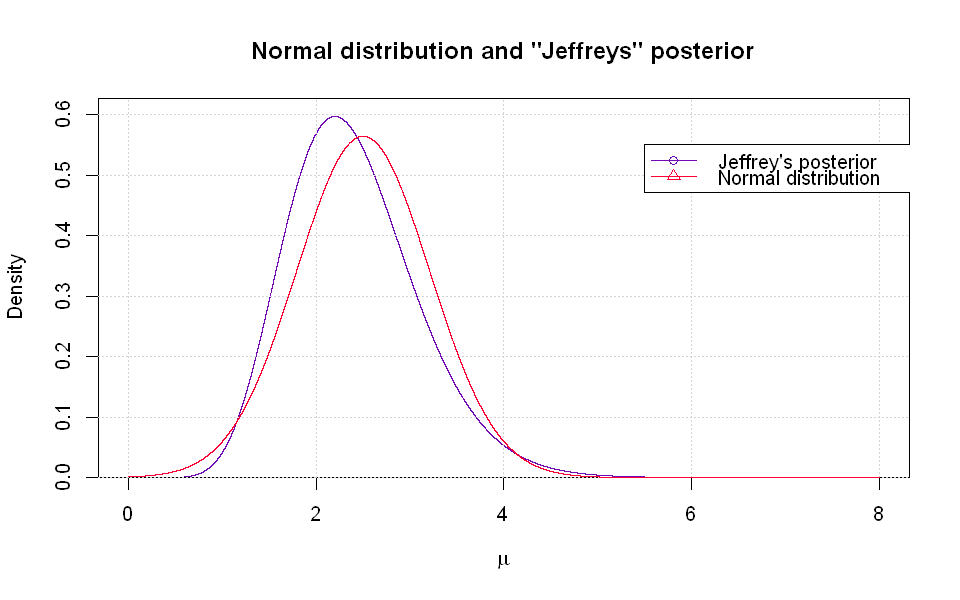

In [9]:
plot(mu, post.n, xaxs='r', yaxs='i', col='#7209B7', type='l', ylim=c(0,max(post.n)+0.03),
     , xlab=expression(mu),main='Normal distribution and "Jeffreys" posterior', 
     ylab='Density')
grid()
lines(mu,norm.unif,col='#FF0035')
legend(x=5.5,y=.55,legend = c("Jeffrey's posterior","Normal distribution"),
       col=c('#7209B7','#FF0035'),pch=c(1,2),cex=1,lty=c(1,1,1))



## Ex 2 

Firstly we have to simulate the data, we will take $\alpha_{true}=42$ and $\beta_{true}=24$, we sample $\vartheta_k$ from a uniform distribution.

$$
\vartheta_k \sim \mathcal{U}\left(-\frac{\pi}{2},\frac{\pi}{2}\right)
$$

In [10]:
p.log.like <- function(alpha,beta,data){
     return(sum(log(beta/(pi*((alpha-data)^2+beta^2)))))
}

In [11]:
gen.data <- function(N,alpha.t,beta.t){
    set.seed(42)
    theta.k <- runif(N,-pi/2,pi/2)
    x.k <- alpha.t + beta.t*tan(theta.k)
    return(x.k)
}

In [12]:
alpha.t <- 42
beta.t <- 50
N <-300
x.k <- gen.data(N,alpha.t,beta.t)

In [13]:
# The number of sample of alpha/beta grid
n.sample <- 1000
x <- x.k[1:N]
alpha <- seq(20,60,length.out = n.sample )
beta <- seq(20,80,length.out = n.sample )


In [14]:
z<- matrix(data = NA, nrow = n.sample, ncol = n.sample)
for (i in 1:n.sample){
    for (j in 1:n.sample){
        z[i,j] <- p.log.like(alpha[i],beta[j],x)
    }
} 
z<- z -max(z)


In [15]:
# find the max values of alpha and beta 
i <- c(which(z==max(z), arr.ind=TRUE))
max.alpha <- alpha[i[1]]
max.beta <- beta[i[2]]
print(paste0("The true alpha is: ",alpha.t ,", the one find by the bayesian inference is:",max.alpha))
print(paste0("The true beta is: ",beta.t ,", the one find by the bayesian inference is:",max.beta))

[1] "The true alpha is: 42, the one find by the bayesian inference is:41.5815815815816"
[1] "The true beta is: 50, the one find by the bayesian inference is:51.7117117117117"


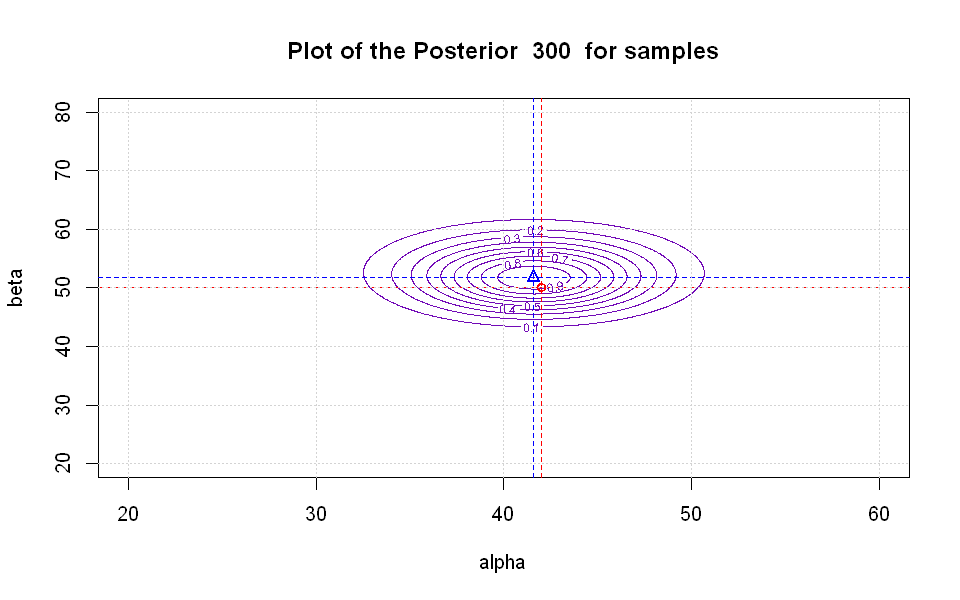

In [16]:
contour(alpha, beta, exp(z), main=paste("Plot of the Posterior ", N," for samples"),
             xlab="alpha", ylab="beta",col="#7209B7")
# Plot of the true value of alpha and beta
points(alpha.t, beta.t, pch=1, col="red", lwd=2) 
abline(h=beta.t, lty=2,col='red')
abline(v=alpha.t, lty=2,col='red')

# Plot the most probable values of the posteriro
points(max.alpha, max.beta, pch=2, col="blue", lwd=2) 
abline(h=max.beta, lty=2,col='blue')
abline(v=max.alpha, lty=2,col='blue') 
grid()

Now we automatize this study and vary the number of samples.

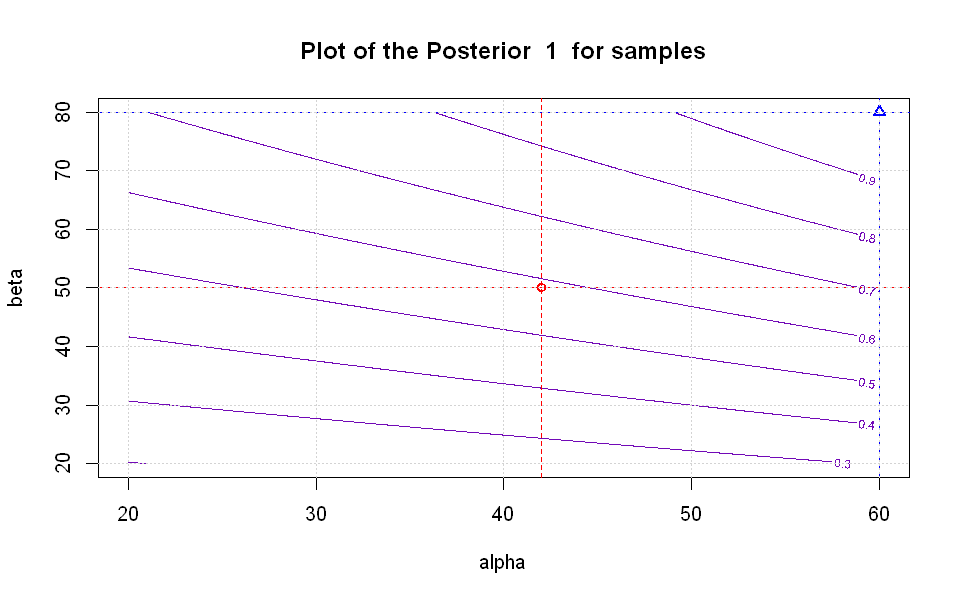

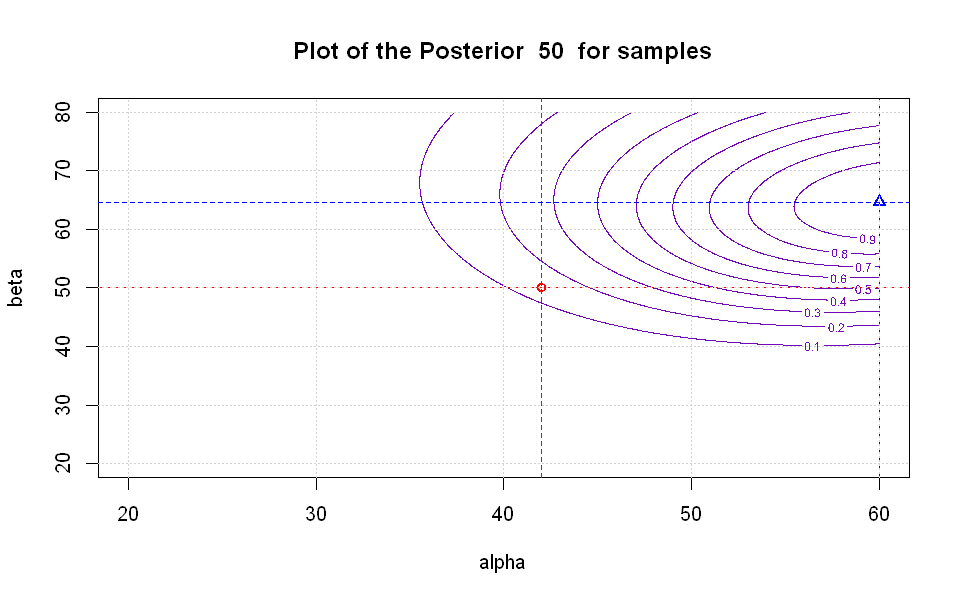

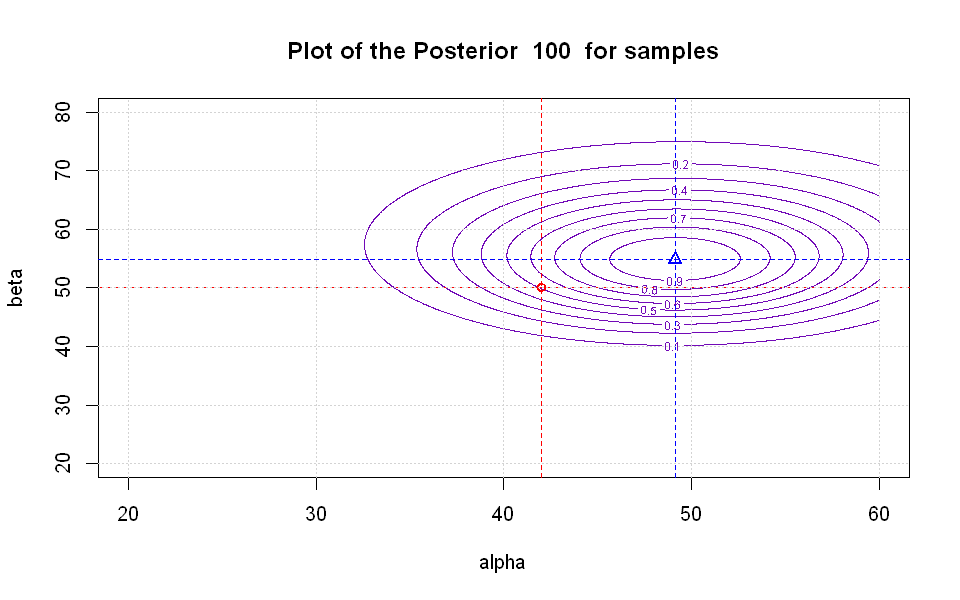

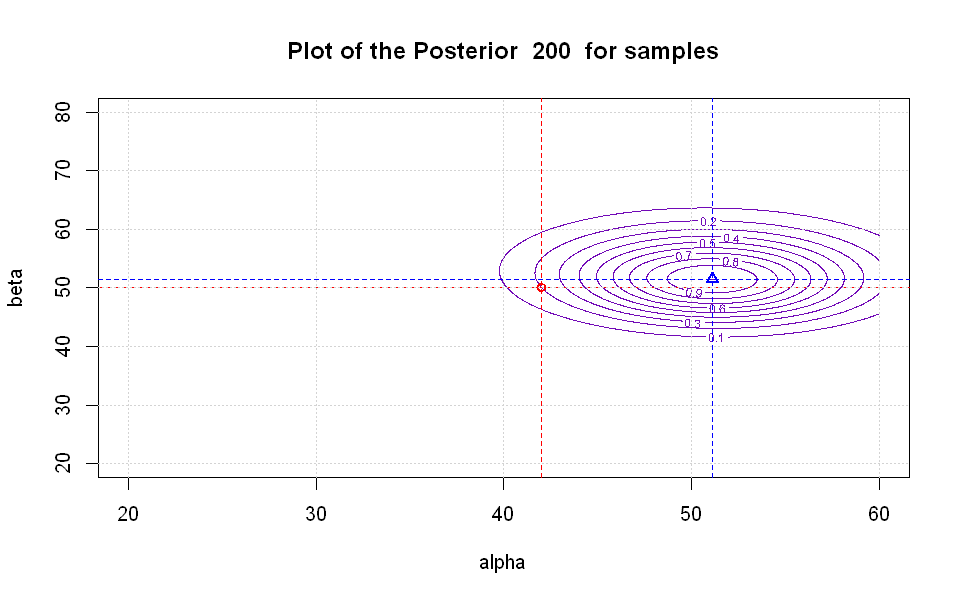

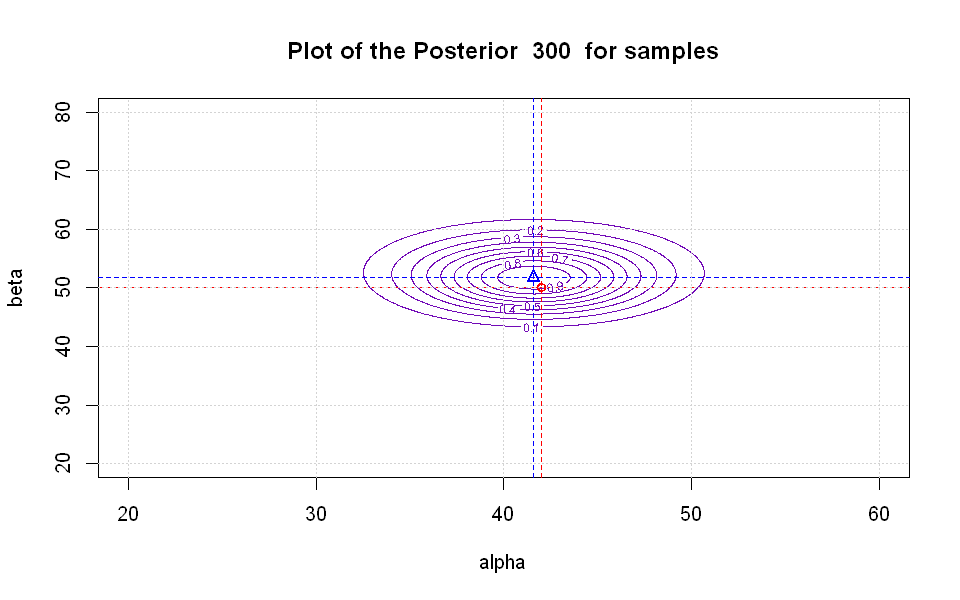

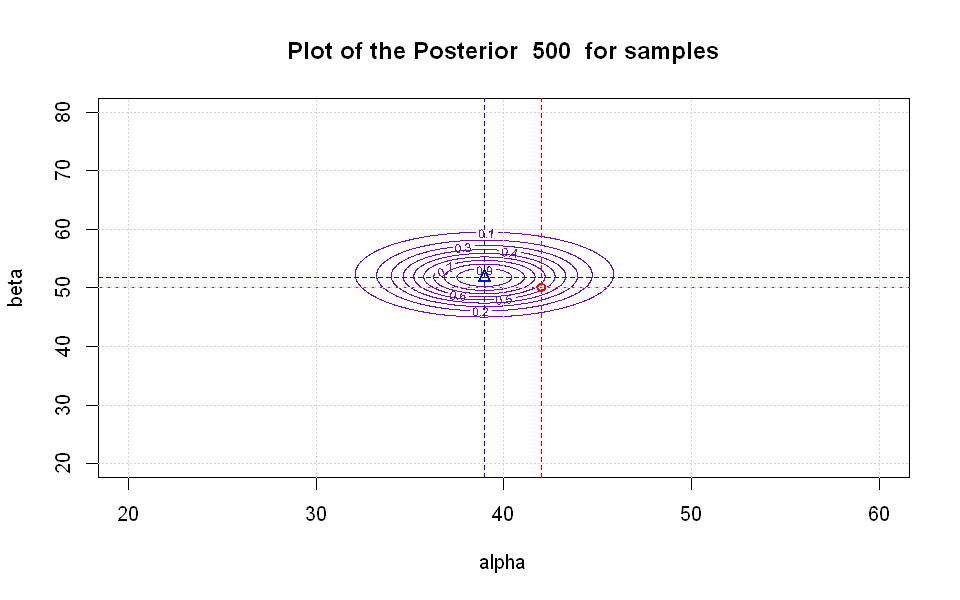

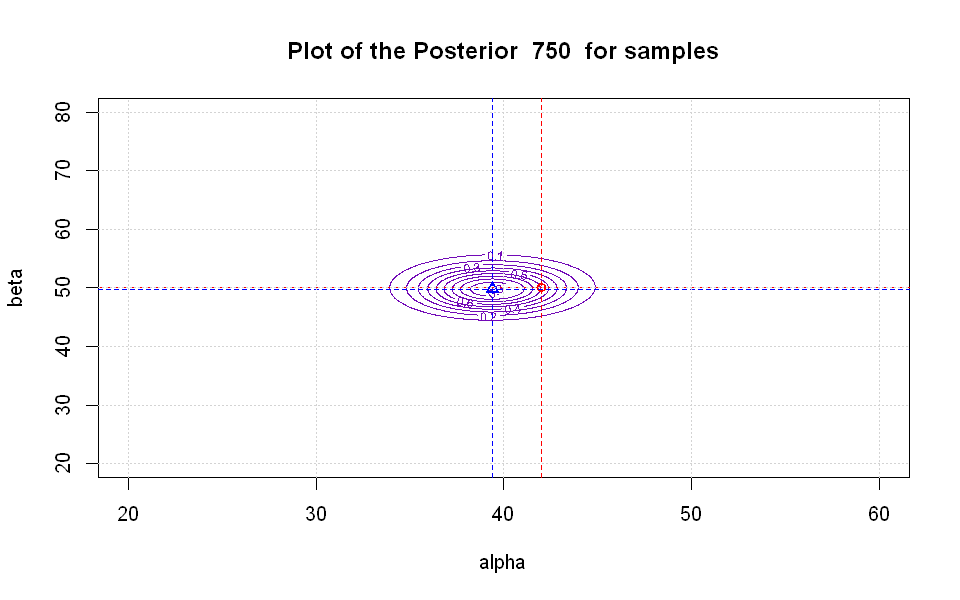

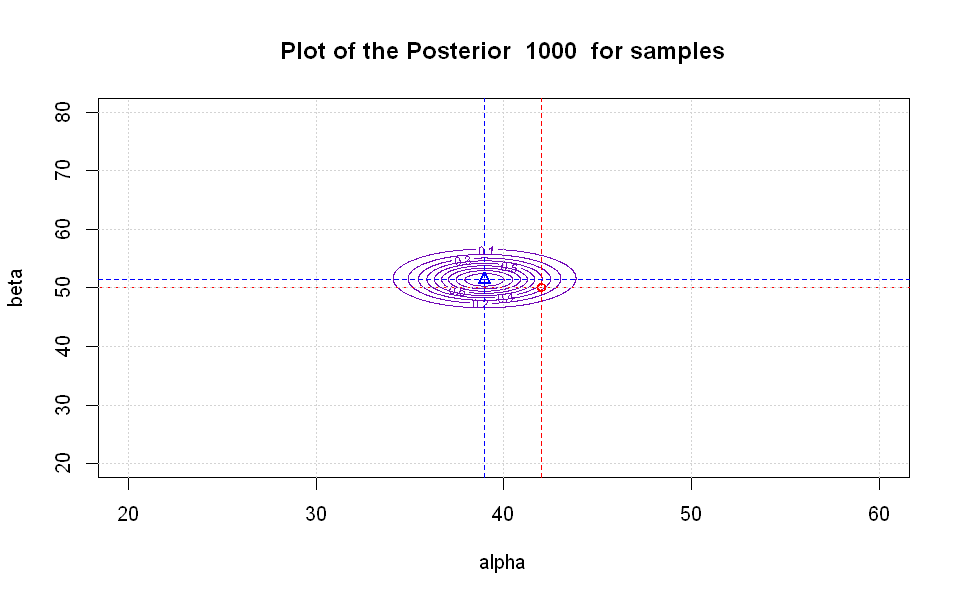

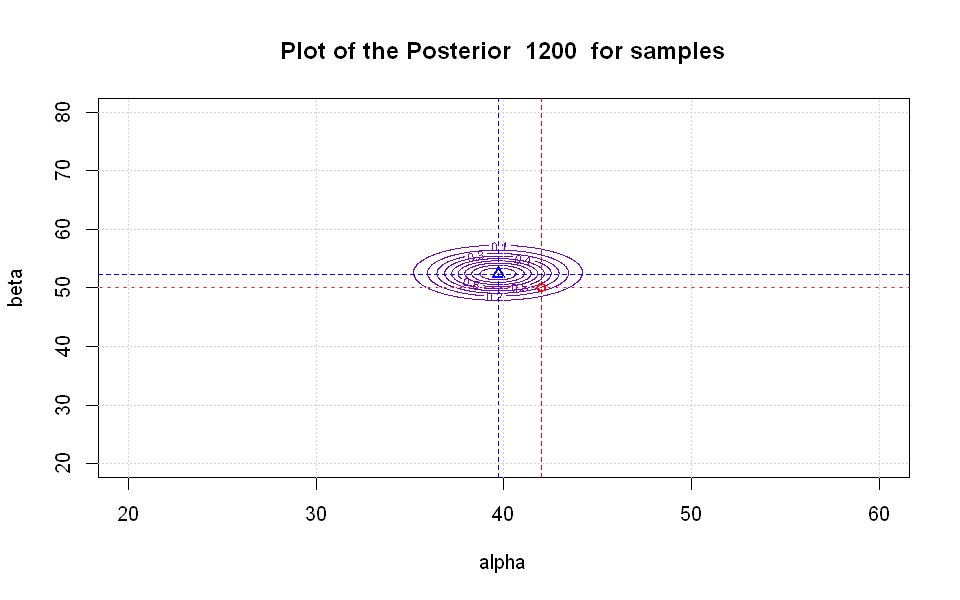

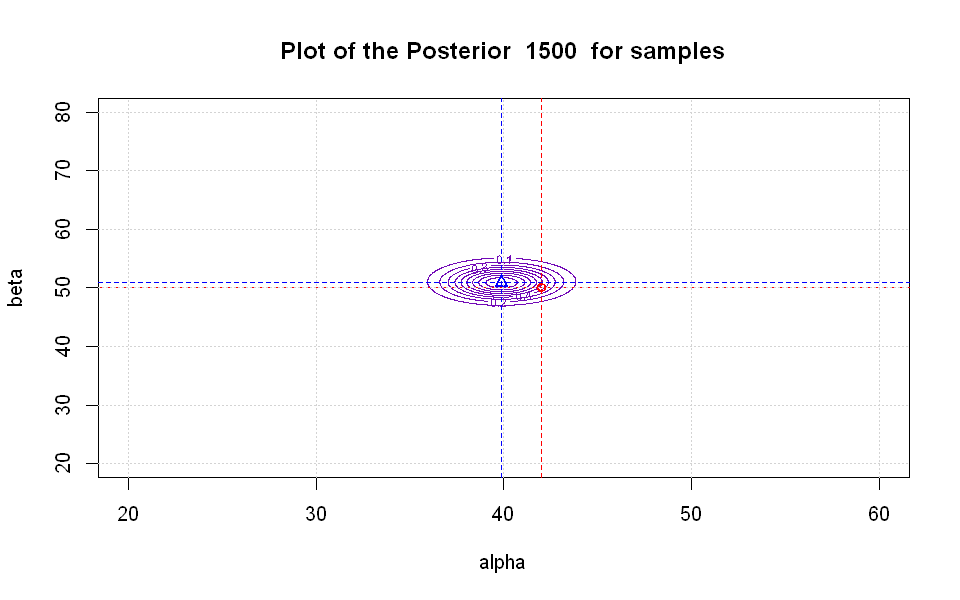

In [17]:
del.a <- NULL
del.b <- NULL
N.try <- c(1,50,100,200,300,500,750,1000,1200,1500)
for (N in N.try){
    x.k <- gen.data(N,alpha.t,beta.t)
    n.sample <- 1000
    x <- x.k[1:N]
    alpha <- seq(20,60,length.out = n.sample )
    beta <- seq(20,80,length.out = n.sample )
    z<- matrix(data = NA, nrow = n.sample, ncol = n.sample)
    for (i in 1:n.sample){
        for (j in 1:n.sample){
            z[i,j] <- p.log.like(alpha[i],beta[j],x)
        }
    } 
    z<- z -max(z)
    i <- c(which(z==max(z), arr.ind=TRUE))
    max.alpha <- alpha[i[1]]
    max.beta <- beta[i[2]]
    contour(alpha, beta, exp(z), main=paste("Plot of the Posterior ", N," for samples"),
                 xlab="alpha", ylab="beta",col="#7209B7")
    # Plot of the true value of alpha and beta
    points(alpha.t, beta.t, pch=1, col="red", lwd=2) 
    abline(h=beta.t, lty=2,col='red')
    abline(v=alpha.t, lty=2,col='red')
    del.a<- append(del.a,abs(alpha.t - max.alpha))
    del.b<- append(del.b,abs(beta.t - max.beta))
    # Plot the most probable values of the posteriro
    points(max.alpha, max.beta, pch=2, col="blue", lwd=2) 
    abline(h=max.beta, lty=2,col='blue')
    abline(v=max.alpha, lty=2,col='blue') 
    grid()
    
}

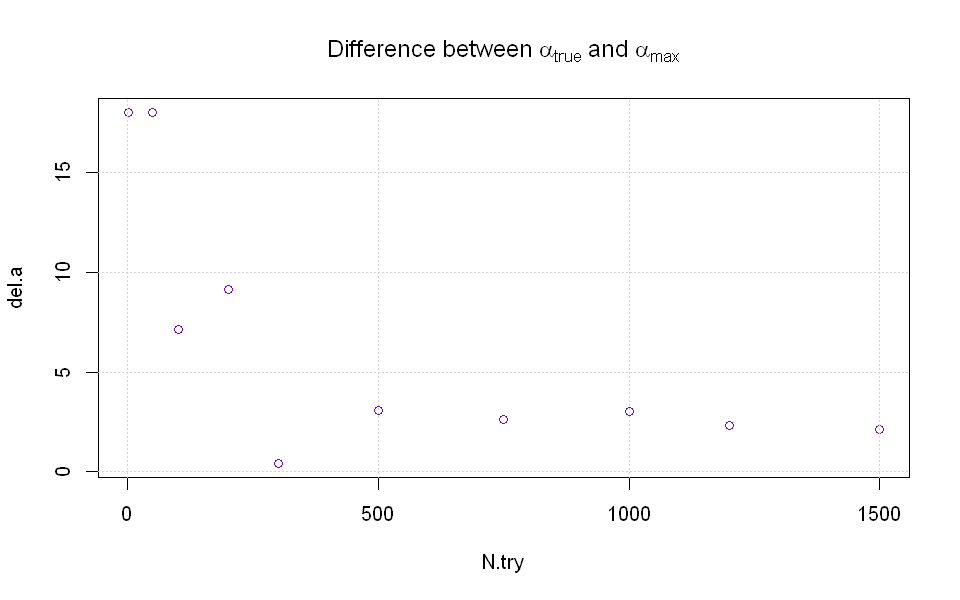

In [18]:
plot(N.try,del.a,col='#7209B7',main=expression(Difference ~between~alpha[true]~and ~alpha[max]))

grid()

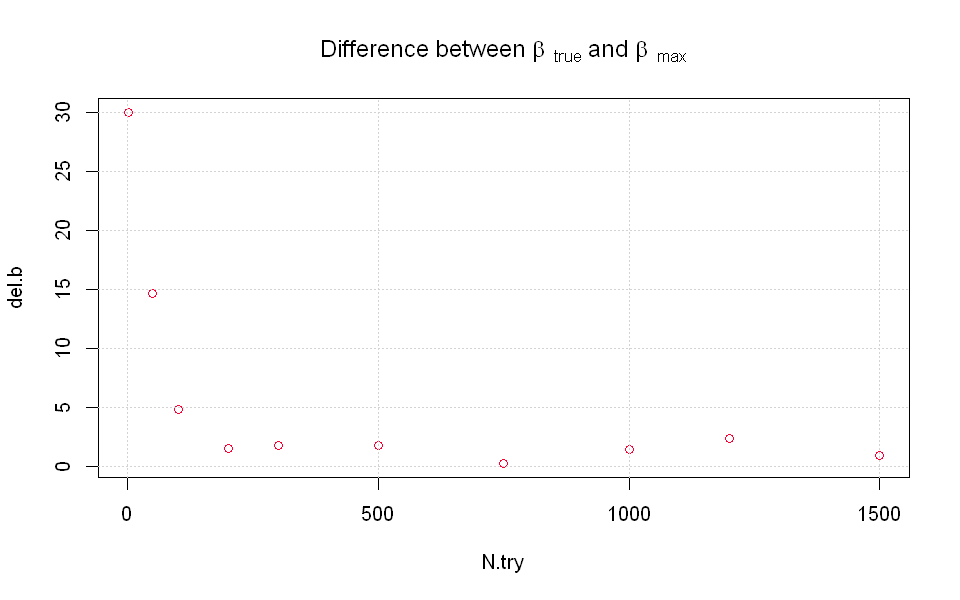

In [19]:
plot(N.try,del.b,col='#FF0035',main=expression(Difference ~between~beta[~ ~true]~and ~beta[~ ~max]))

grid()

## Ex 3

Generate the model and make the analysis for $w$ and $\dfrac{A}{B}$ fixed.

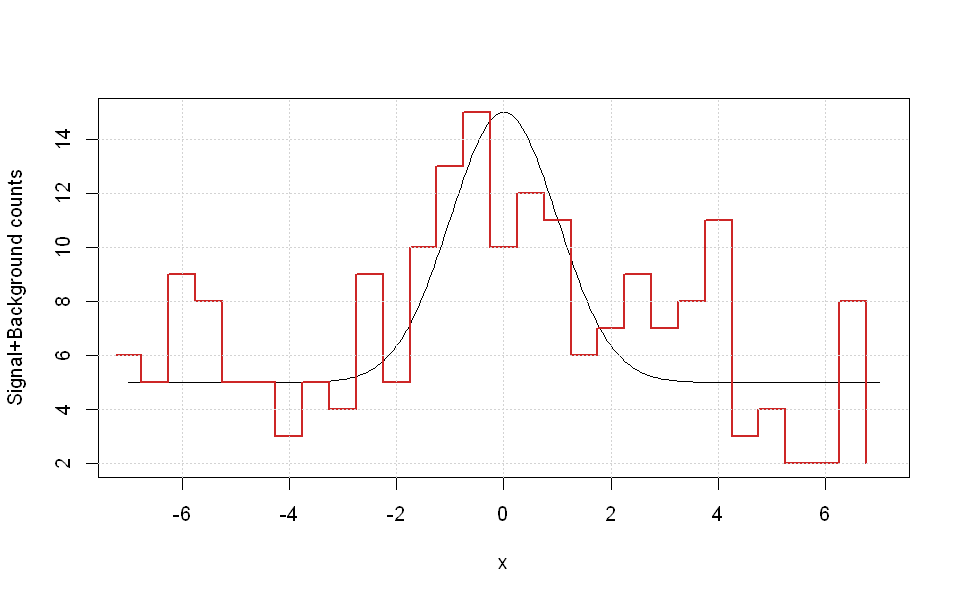

In [20]:
# - Generative model
signal <- function(x, a, b, x0, w, t) {
t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}
# Define model parameters
x0 <- 0 # Signal peak
w <-1 # Signal width
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
# - Generate the observed data
set.seed(208)
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
ddat <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
plot(xplot , splot ,xlab="x", ylab="Signal+Background counts",t='l',xlim=range(xplot), ylim=range(c(splot , ddat )))
par(new=TRUE)
xdat.off <- xdat -0.25
lines(xdat.off, ddat , type='s',col='firebrick3',lwd=2)
grid()

Set up the grid for the parameters.

In [21]:
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim )/ Nsamp
delta_b <- diff(blim )/ Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid

Define the log posterior and make the plot.

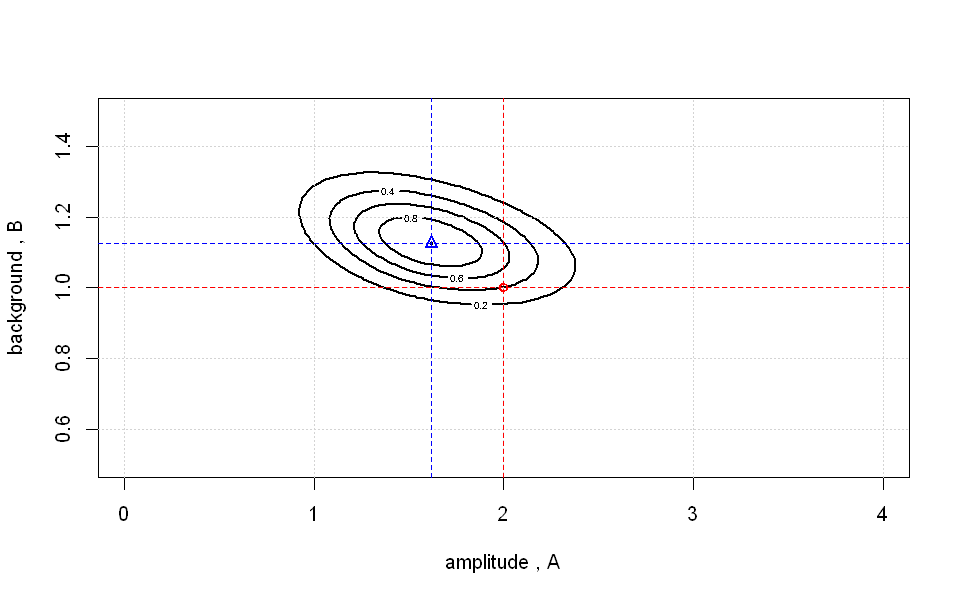

In [22]:
# Log posterior
log.post <- function(d, x, a, b, x0, w, t) {
if(a<0 || b <0) {return(-Inf )} # the effect of the prior
sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}
# Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
z <- matrix(data=NA , nrow=length(a), ncol=length(b))
for(j in 1:length(a)) {
for(k in 1:length(b)) {
z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
}
}
z <- z - max(z) # set maximum to zero
# Plot unnormalized 2D posterior as contours.
contour(a, b, exp(z),
nlevels = 5,
labcex = 0.5,
lwd = 2,
xlab="amplitude , A",
ylab="background , B")
grid()
points(A.true, B.true, pch=1, col="red", lwd=2) 
abline(h=B.true, lty=2,col='red')
abline(v=A.true, lty=2,col='red')
i <- c(which(z==max(z), arr.ind=TRUE))
max.A <- a[i[1]]
max.B <- b[i[2]]
# Plot the most probable values of the posteriro
points(max.A, max.B, pch=2, col="blue", lwd=2) 
abline(h=max.B, lty=2,col='blue')
abline(v=max.A, lty=2,col='blue')


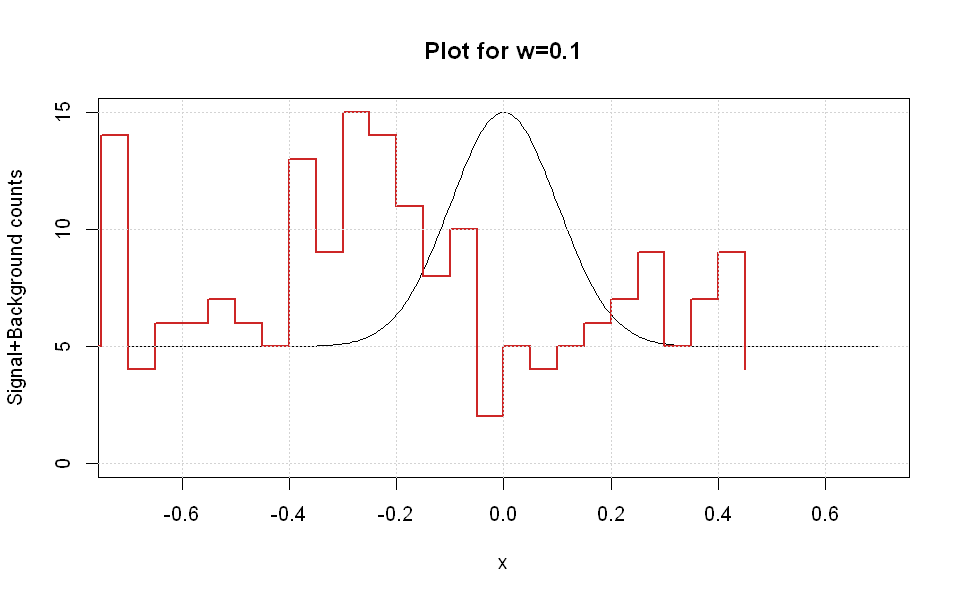

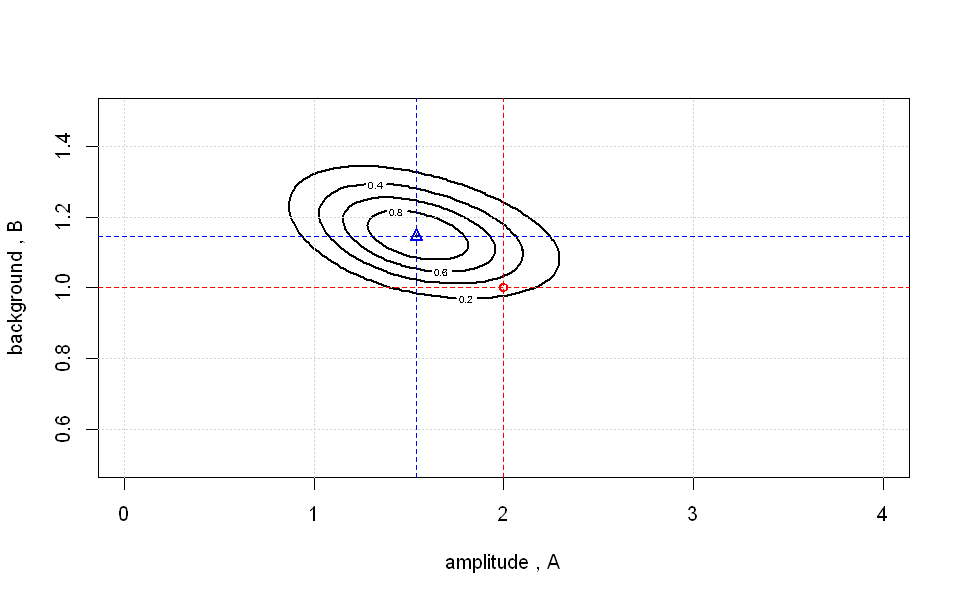

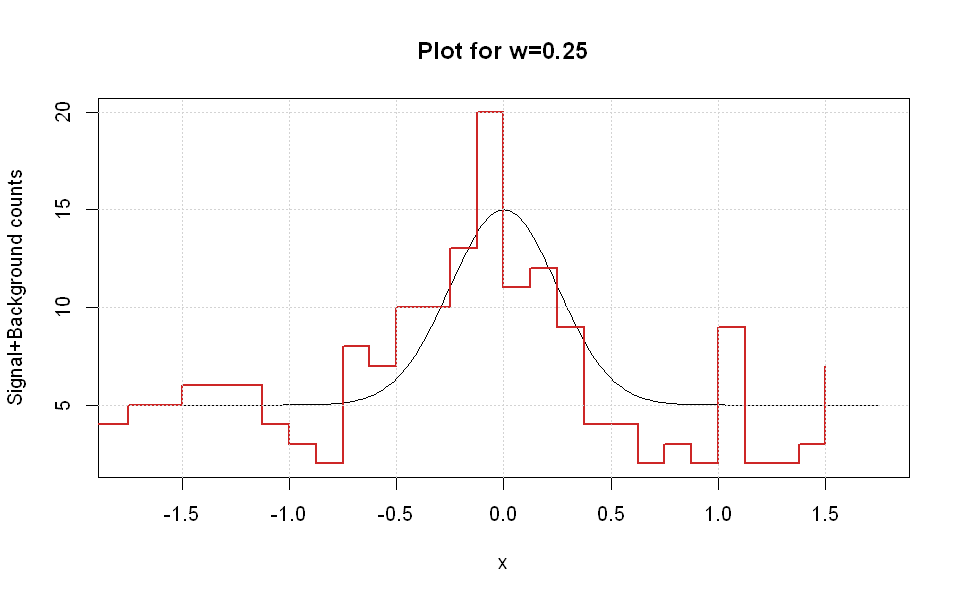

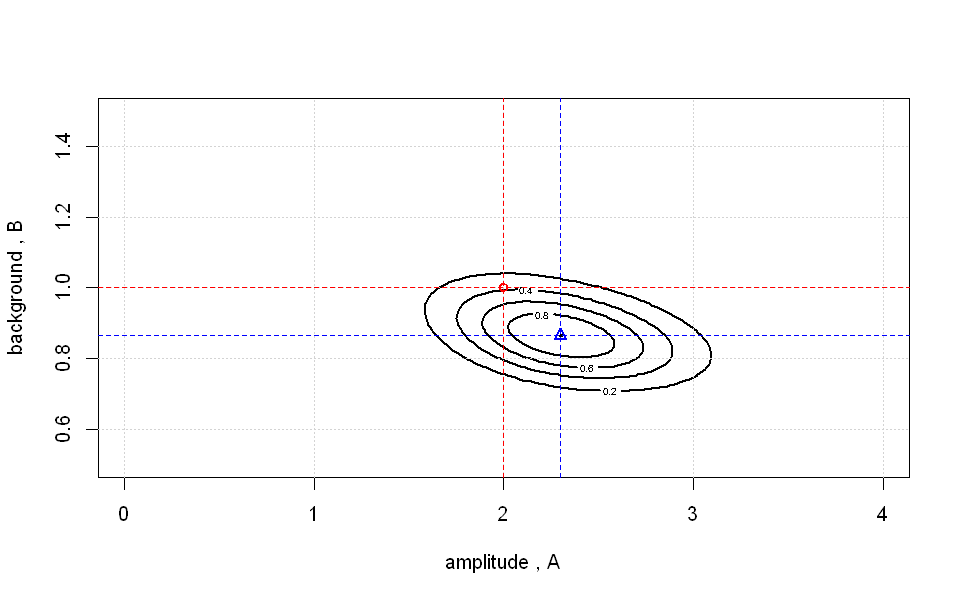

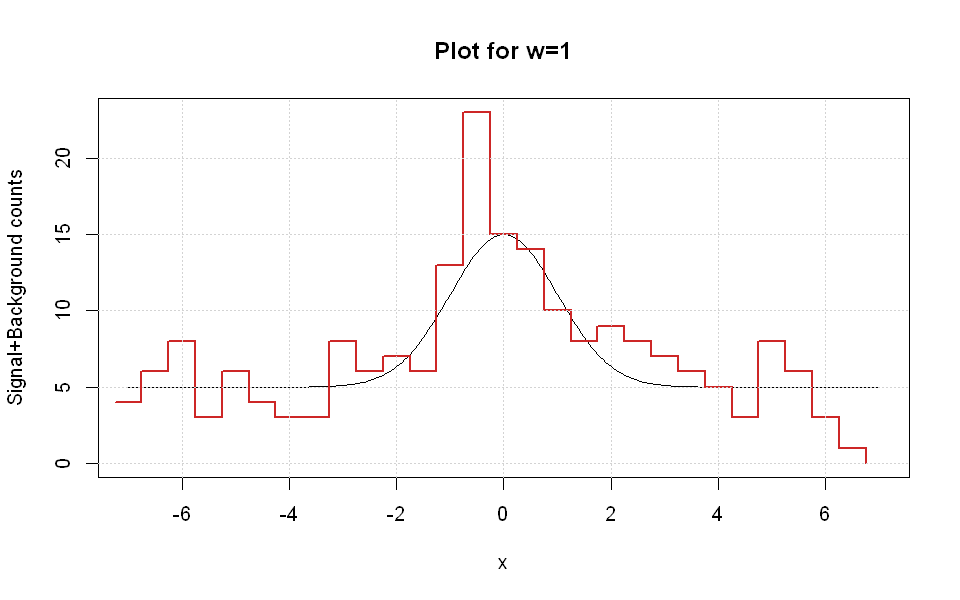

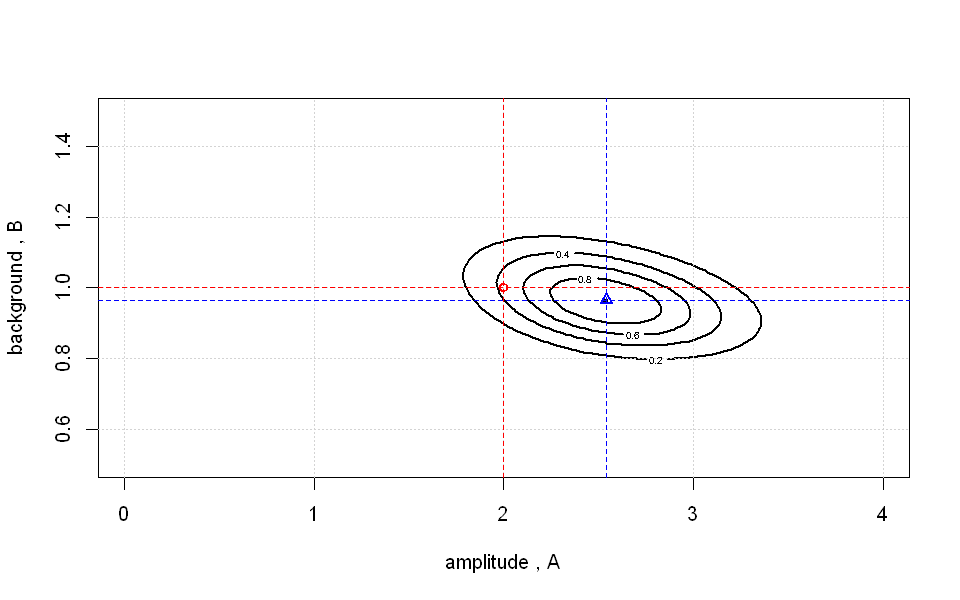

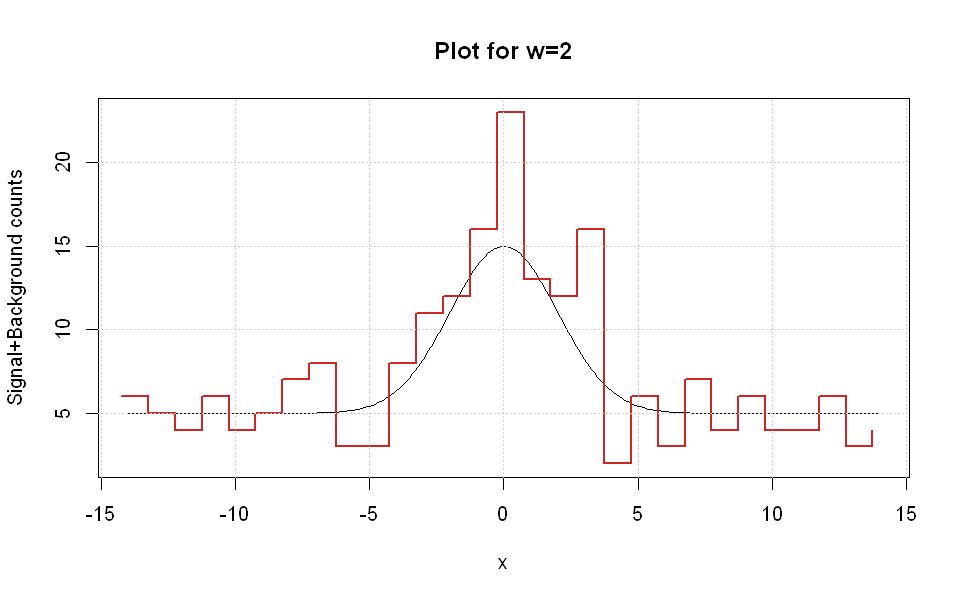

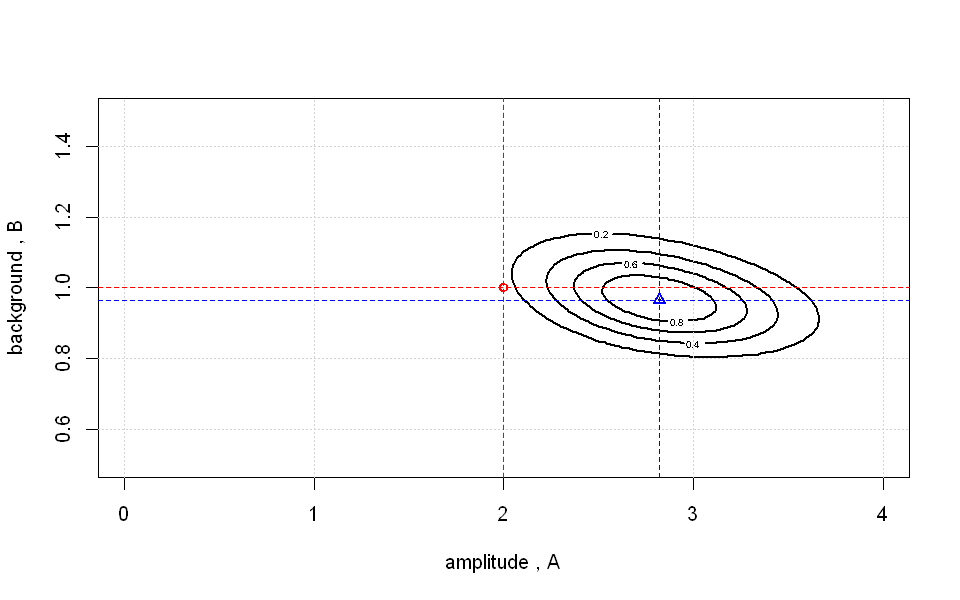

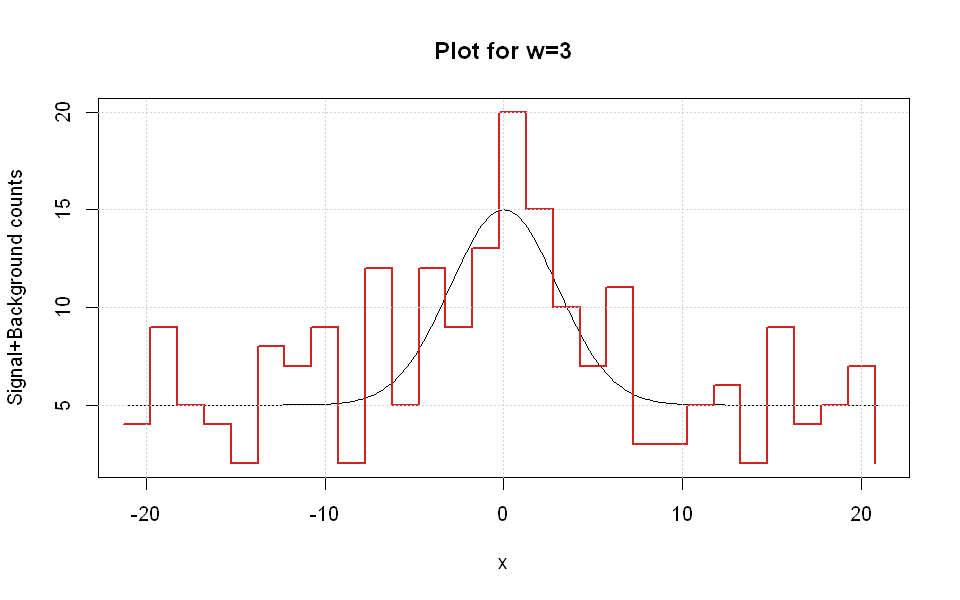

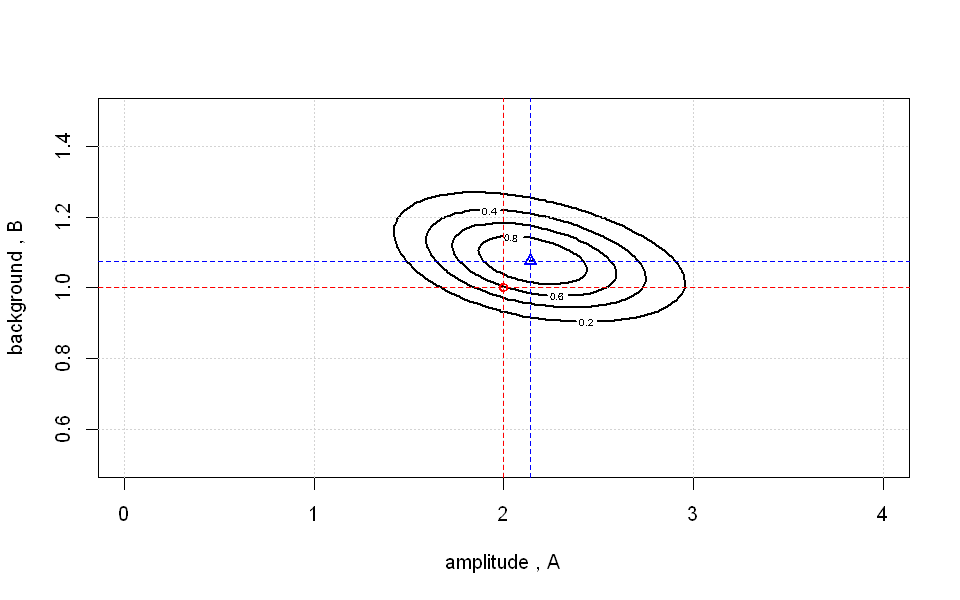

In [23]:
w.try <-c(0.1,0.25,1,2,3)
for (w in w.try){

    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
    plot(xplot , splot ,xlab="x", ylab="Signal+Background counts",t='l',xlim=range(xplot), ylim=range(c(splot , ddat )),main=paste0("Plot for w=" ,w))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    lines(xdat.off, ddat , type='s',col='firebrick3',lwd=2)
    grid()
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    # Plot unnormalized 2D posterior as contours.
    contour(a, b, exp(z),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="amplitude , A",
    ylab="background , B")
    grid()
    i <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- a[i[1]]
    max.B <- b[i[2]]
    points(A.true, B.true, pch=1, col="red", lwd=2) 
    abline(h=B.true, lty=2,col='red')
    abline(v=A.true, lty=2,col='red')
    # Plot the most probable values of the posteriro
    points(max.A, max.B, pch=2, col="blue", lwd=2) 
    abline(h=max.B, lty=2,col='blue')
    abline(v=max.A, lty=2,col='blue')

}

To enrich the statistics i increment the number of $w$, because maybe between $2$ and $3$ we can have a better $\left|A_{true}  - A_{max}\right|$ .

In [24]:
w.try <-seq(from=0.1,to=3,length.out = 100)
del.A <- NULL
del.B <- NULL
for (w in w.try){

    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
    xdat.off <- xdat -0.25
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    # Plot unnormalized 2D posterior as contours.
    i <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- a[i[1]]
    max.B <- b[i[2]]
    del.A<- append(del.A,abs(A.true - max.A))
    del.B<- append(del.B,abs(B.true - max.B))

}

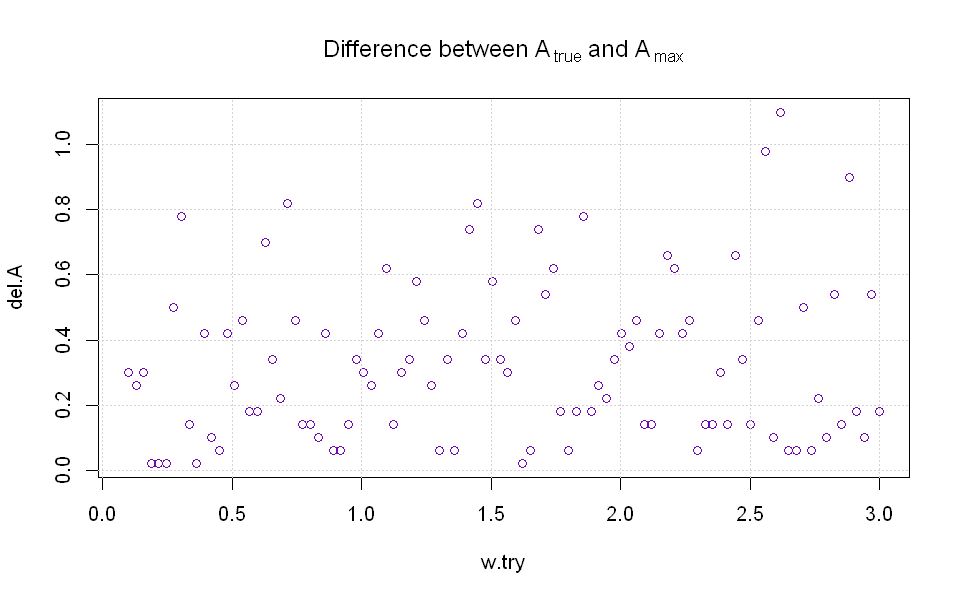

In [25]:
plot(w.try,del.A,col='#7209B7',main=expression(Difference ~between~A[~true]~and ~A[~max]))

grid()

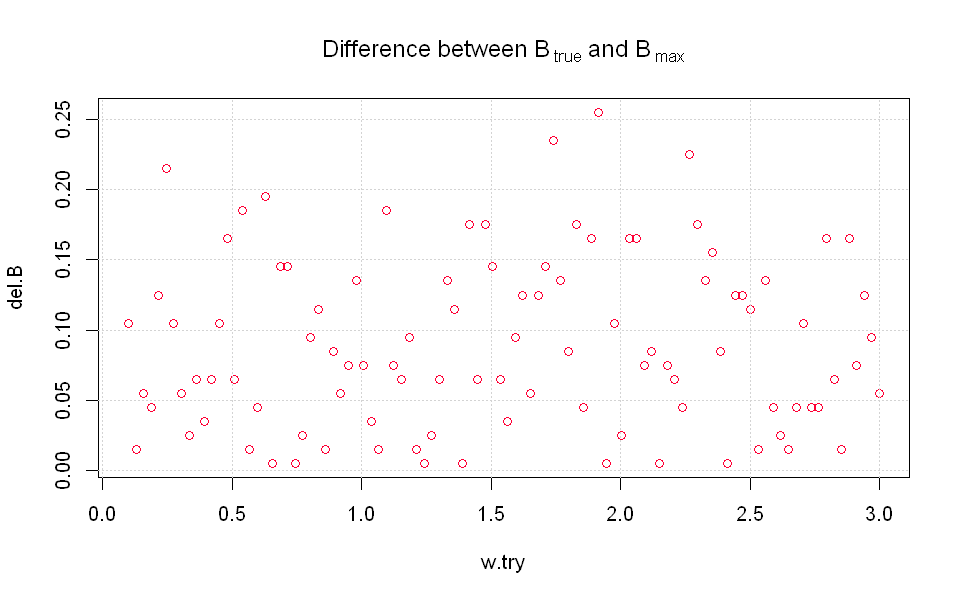

In [26]:
plot(w.try,del.B,col='#FF0035',main=expression(Difference ~between~B[~true]~and ~B[~max]))

grid()

My theory was wrong...


It seems that there is no correlation between $w$ and the results.

Now we study the results varying the $\dfrac{A}{B}$ ratio.

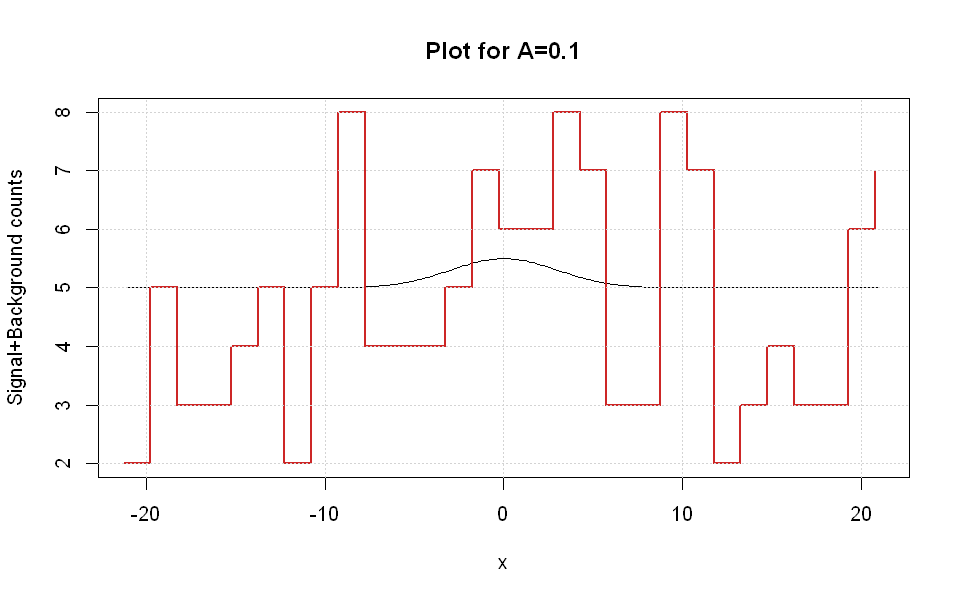

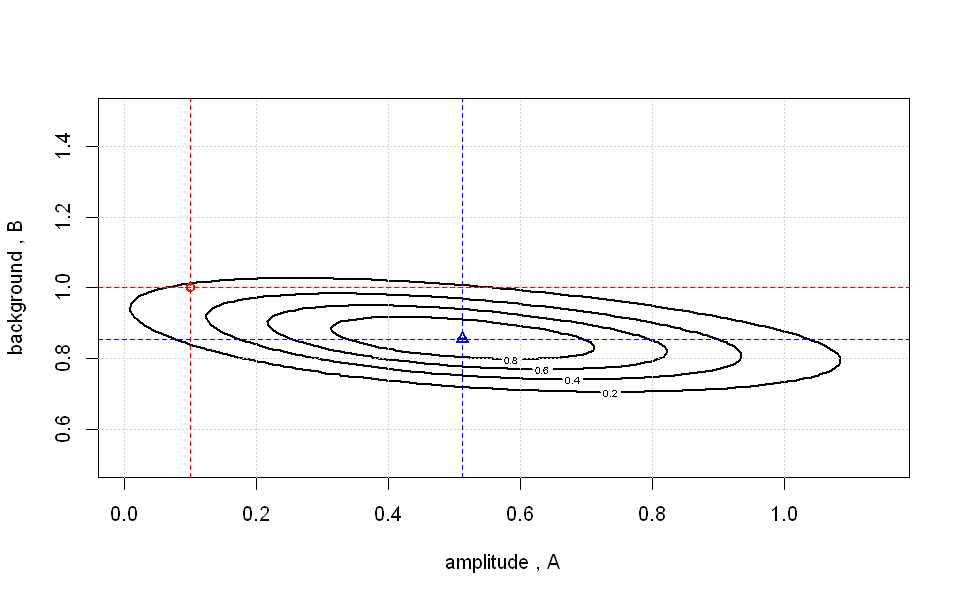

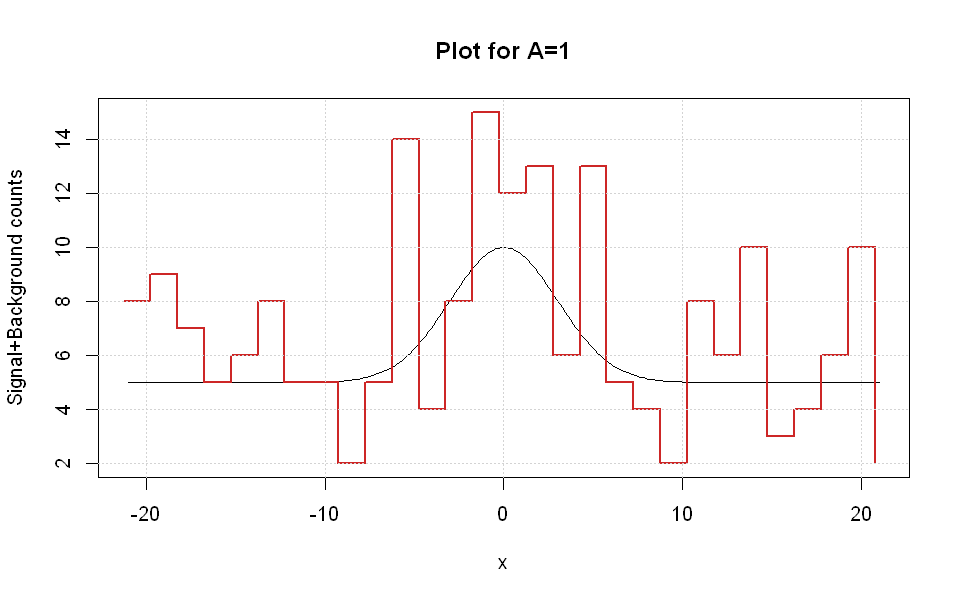

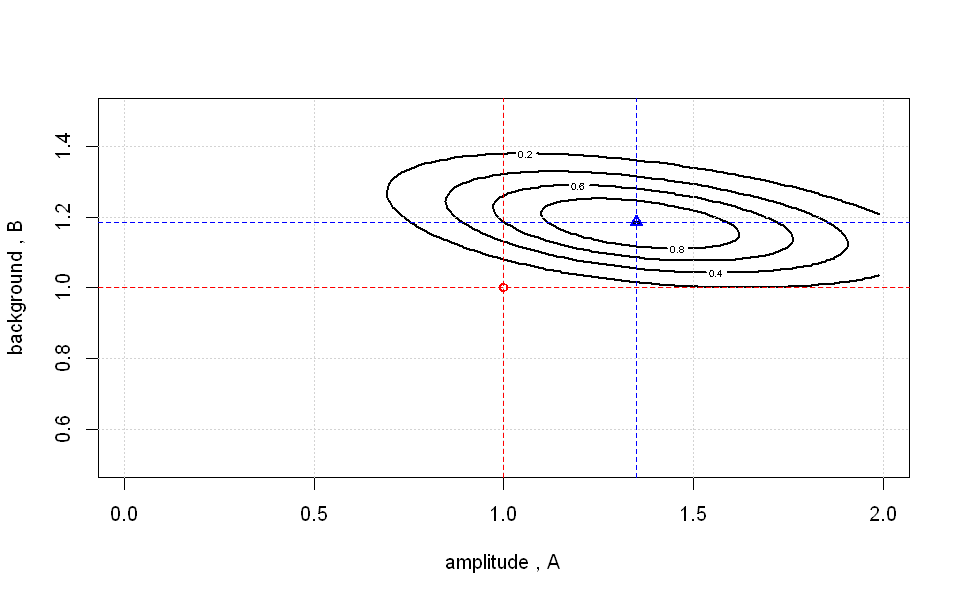

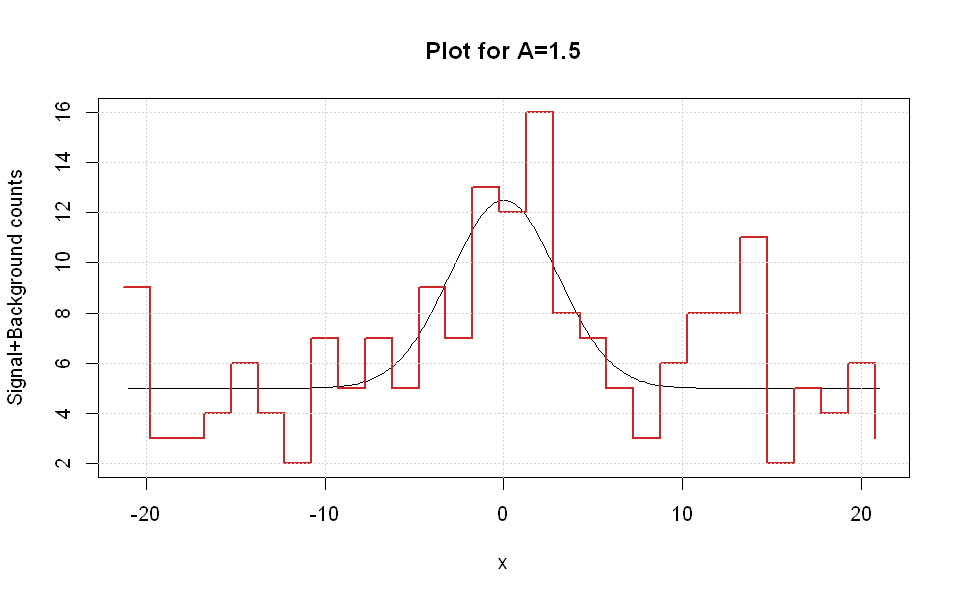

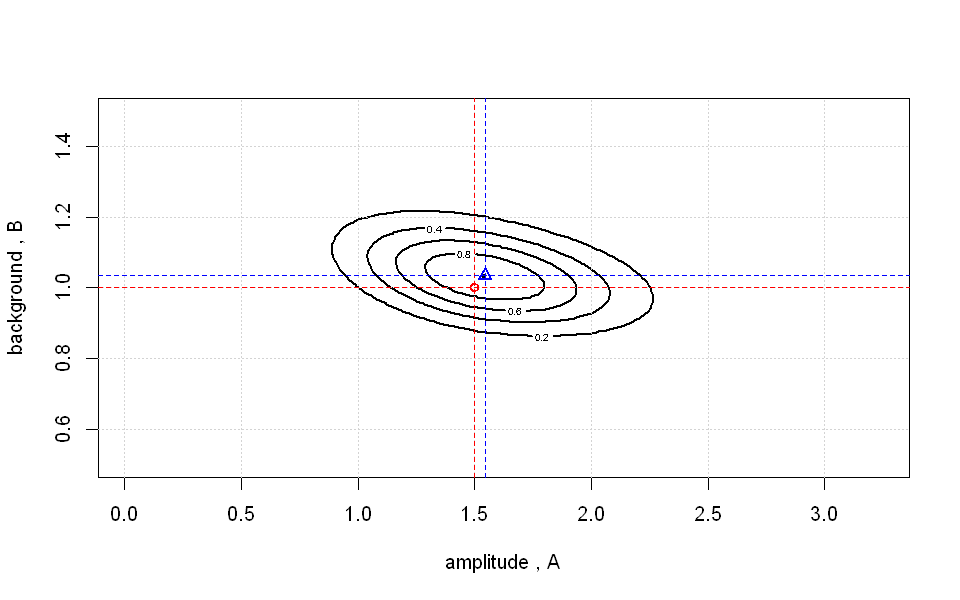

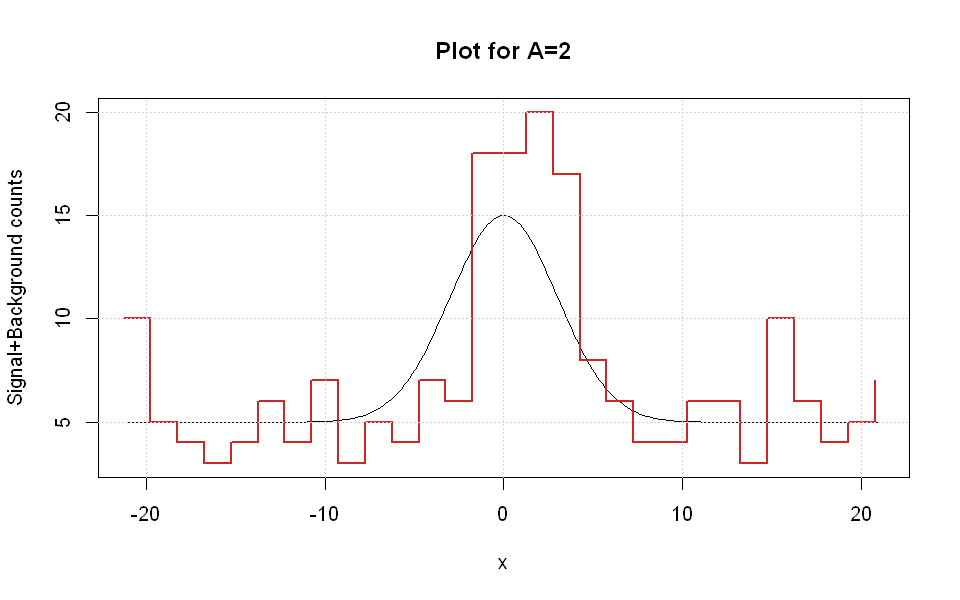

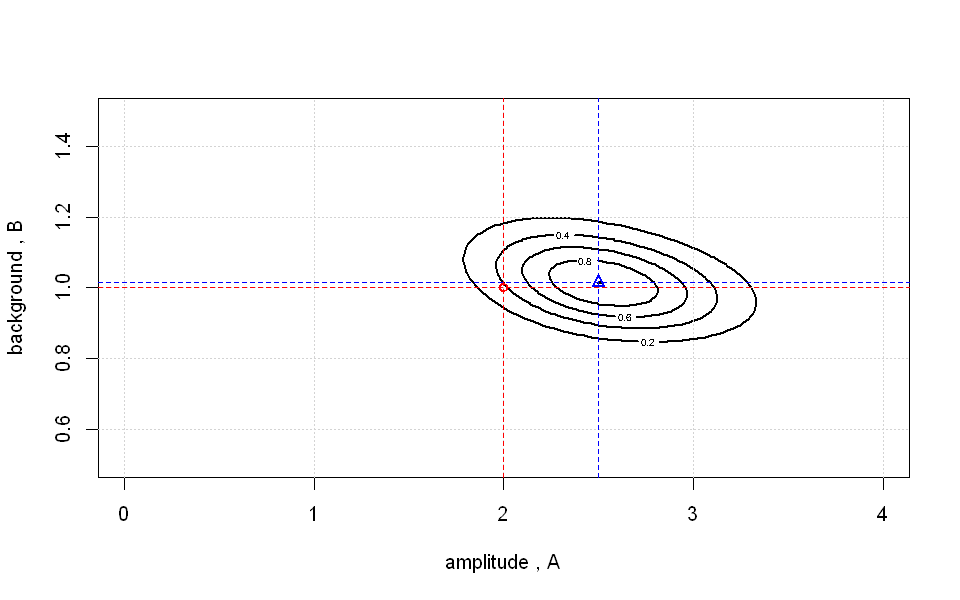

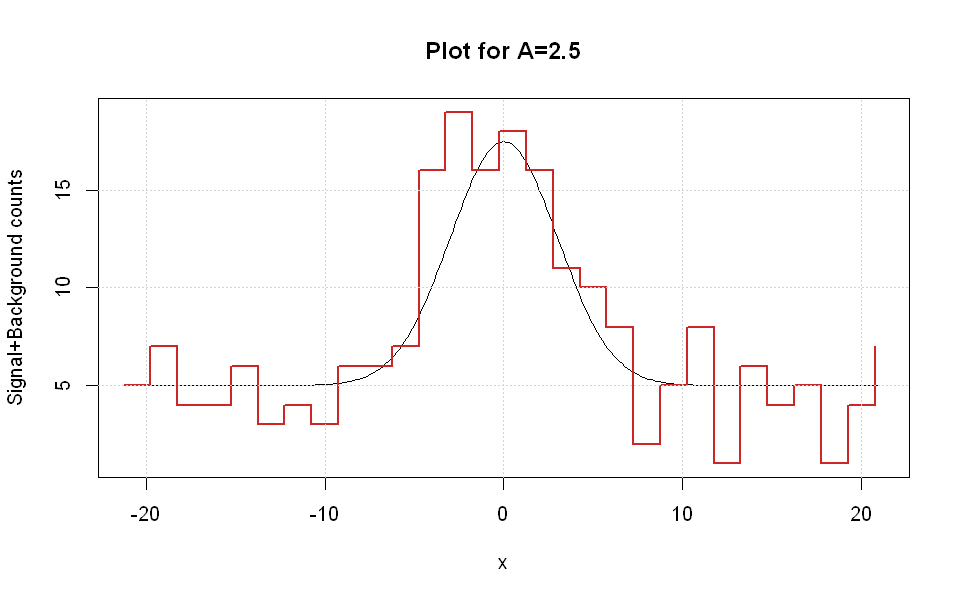

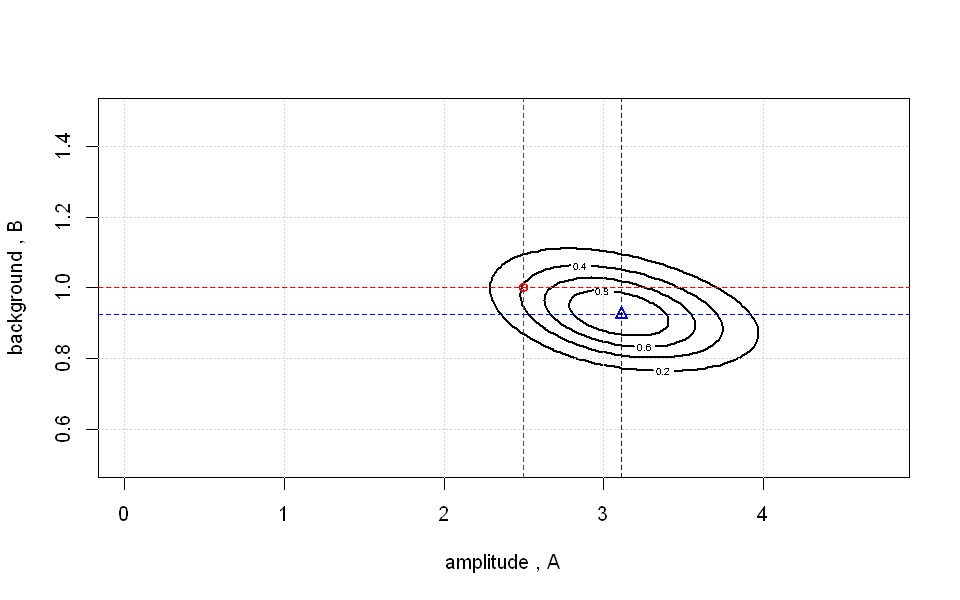

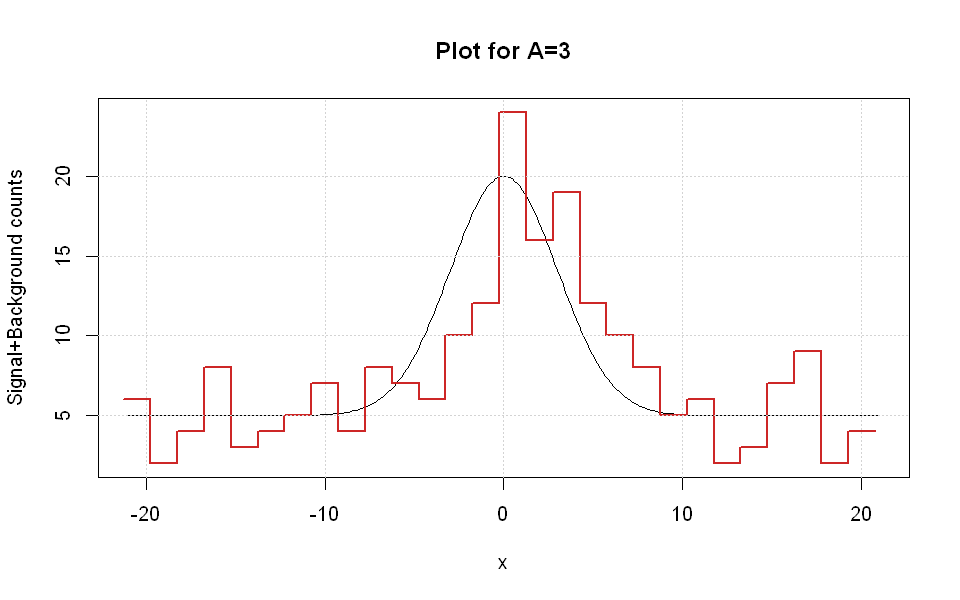

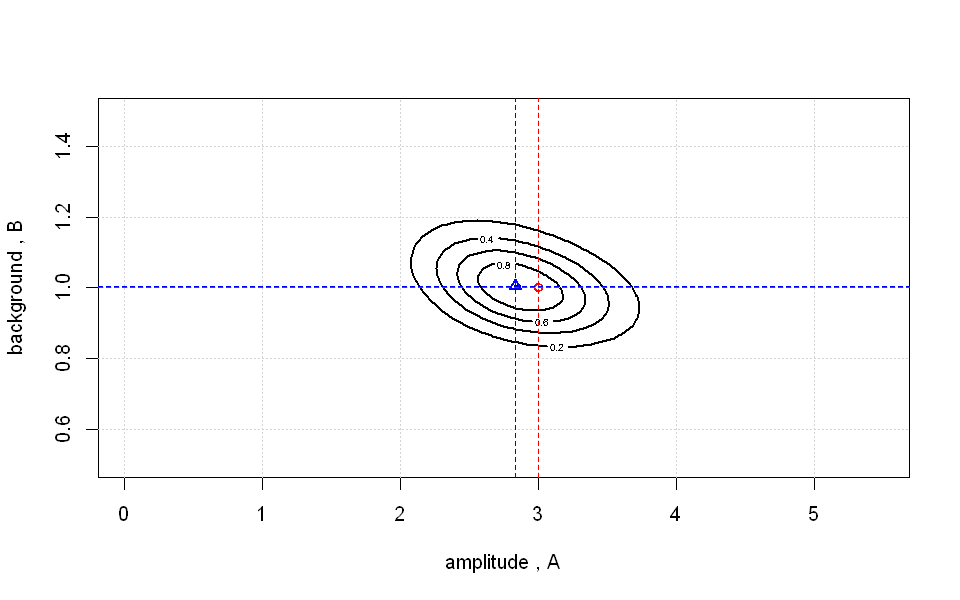

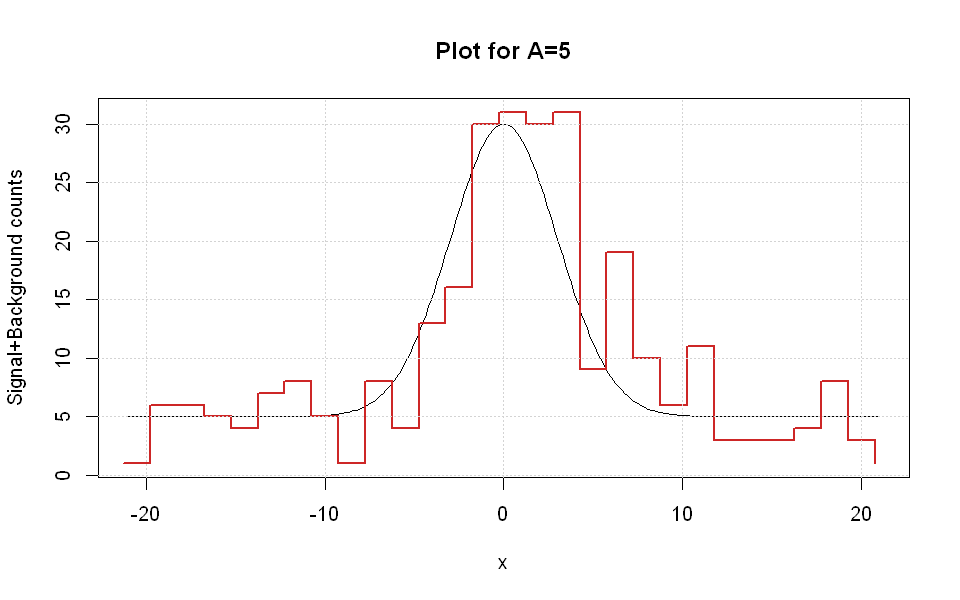

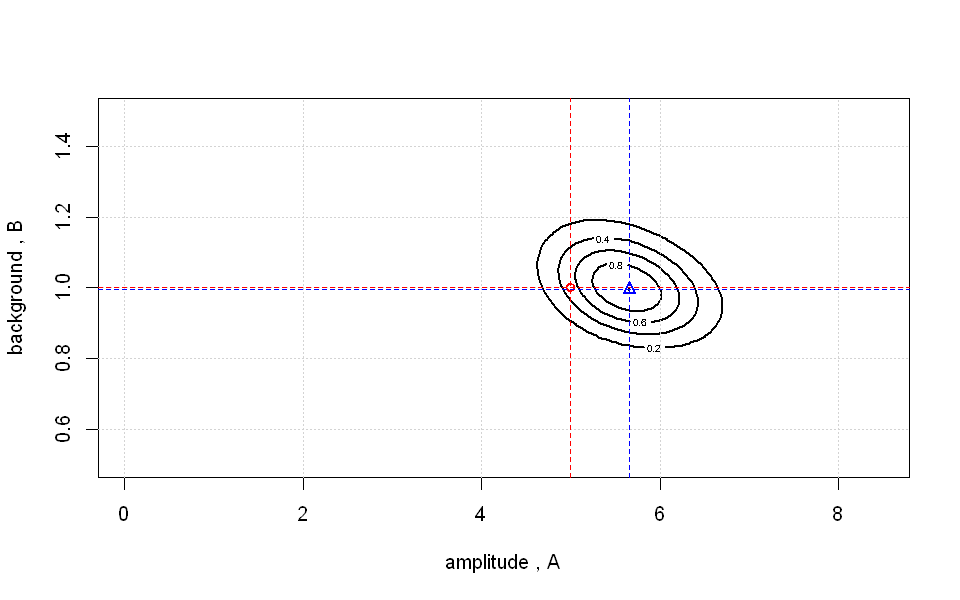

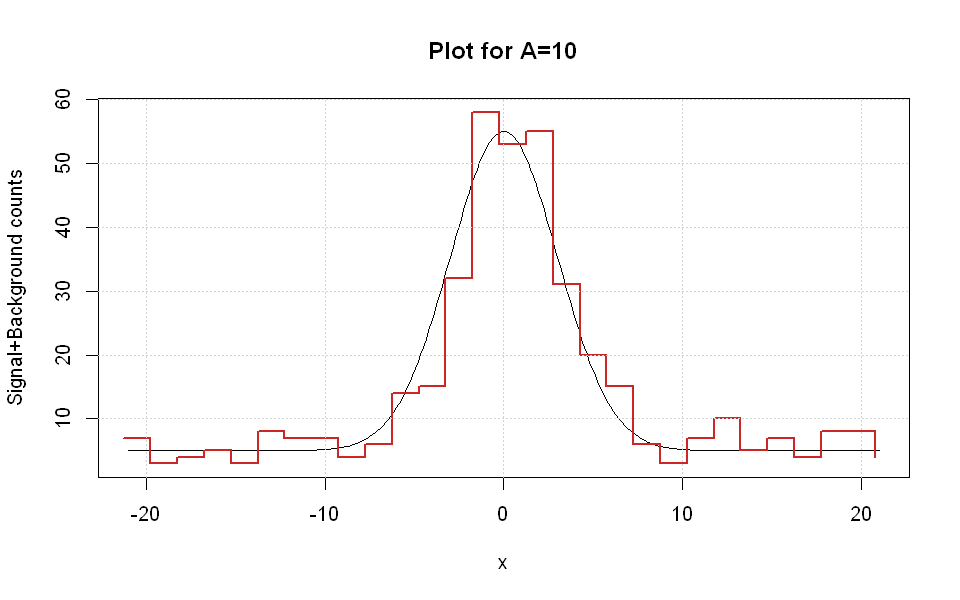

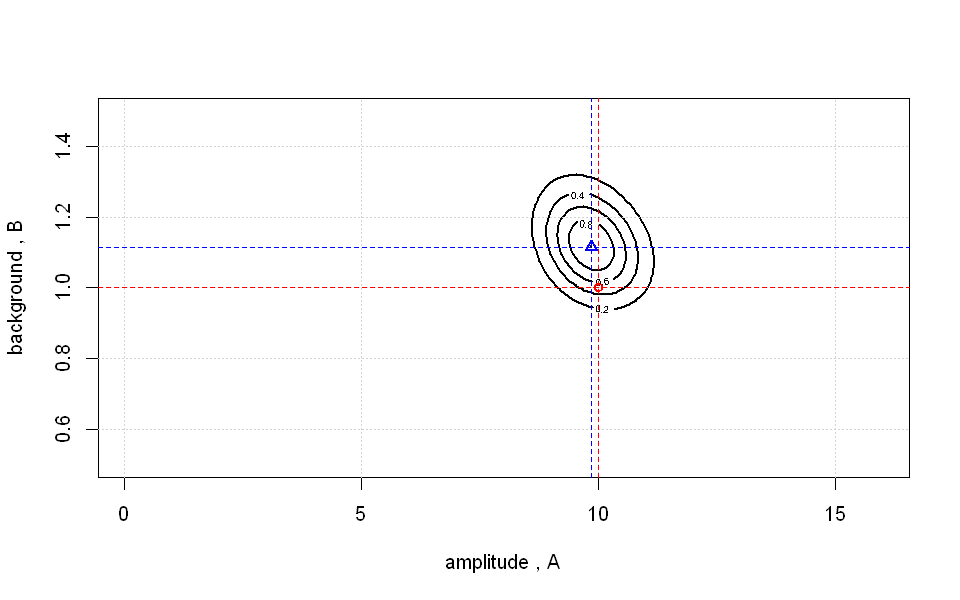

In [27]:
A.try <- c(0.1,1,1.5,2,2.5,3,5,10)
for (A.t in A.try){
    # we have to redefine the a grid
    if (A.t==1){
        alim <- c(0.0, 2)
        Nsamp <- 500
        delta_a <- diff(alim )/ Nsamp
        a <- alim[1] + diff(alim )* uniGrid
    }
    else{alim <- c(0.0, A.t+A.t/2+1)
    Nsamp <- 500
    delta_a <- diff(alim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    }
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.t , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.t , B.true , x0, w, Delta.t)
    plot(xplot , splot ,xlab="x", ylab="Signal+Background counts",t='l',xlim=range(xplot), ylim=range(c(splot , ddat )),main=paste0("Plot for A=" ,A.t))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    lines(xdat.off, ddat , type='s',col='firebrick3',lwd=2)
    grid()
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    # Plot unnormalized 2D posterior as contours.
    contour(a, b, exp(z),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="amplitude , A",
    ylab="background , B")
    grid()
    i <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- a[i[1]]
    max.B <- b[i[2]]
    points(A.t, B.true, pch=1, col="red", lwd=2) 
    abline(h=B.true, lty=2,col='red')
    abline(v=A.t, lty=2,col='red')
    # Plot the most probable values of the posteriro
    points(max.A, max.B, pch=2, col="blue", lwd=2) 
    abline(h=max.B, lty=2,col='blue')
    abline(v=max.A, lty=2,col='blue')

}

I try the same analysis made above for $w$.

In [28]:
del.A <- NULL
del.B <- NULL
A.try <- seq(from=0.05,to=10,length.out = 1000)
for (A.t in A.try){
    
    alim <- c(0.0, A.t+A.t/2+1)
    Nsamp <- 500
    delta_a <- diff(alim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.t , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.t , B.true , x0, w, Delta.t)
    xdat.off <- xdat -0.25
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    # Plot unnormalized 2D posterior as contours.
    i <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- a[i[1]]
    max.B <- b[i[2]]
    
    i <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- a[i[1]]
    max.B <- b[i[2]]
    del.A<- append(del.A,abs(A.t - max.A))
    del.B<- append(del.B,abs(B.true - max.B))

}

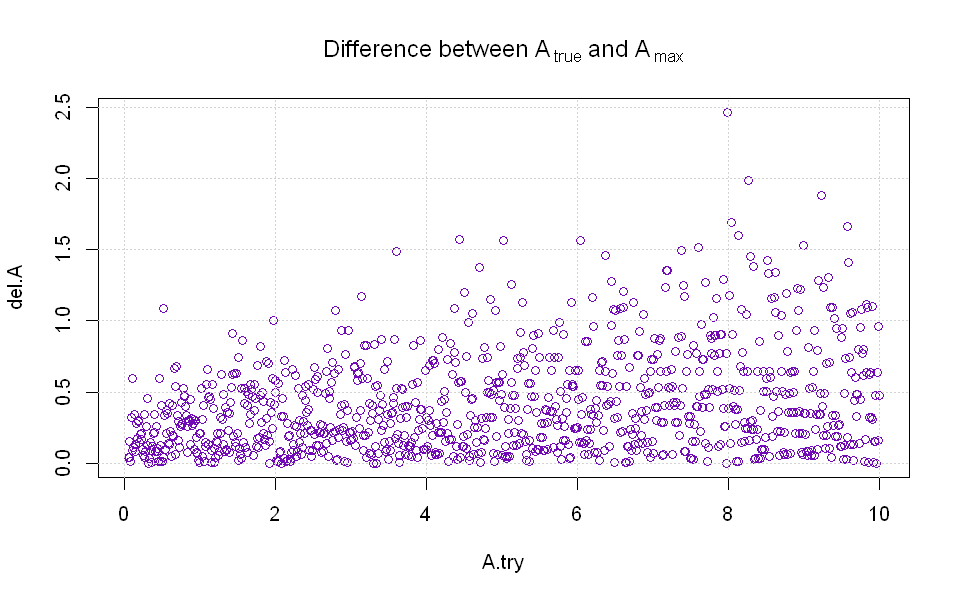

In [29]:
plot(A.try,del.A,col='#7209B7',main=expression(Difference ~between~A[~true]~and ~A[~max]))

grid()

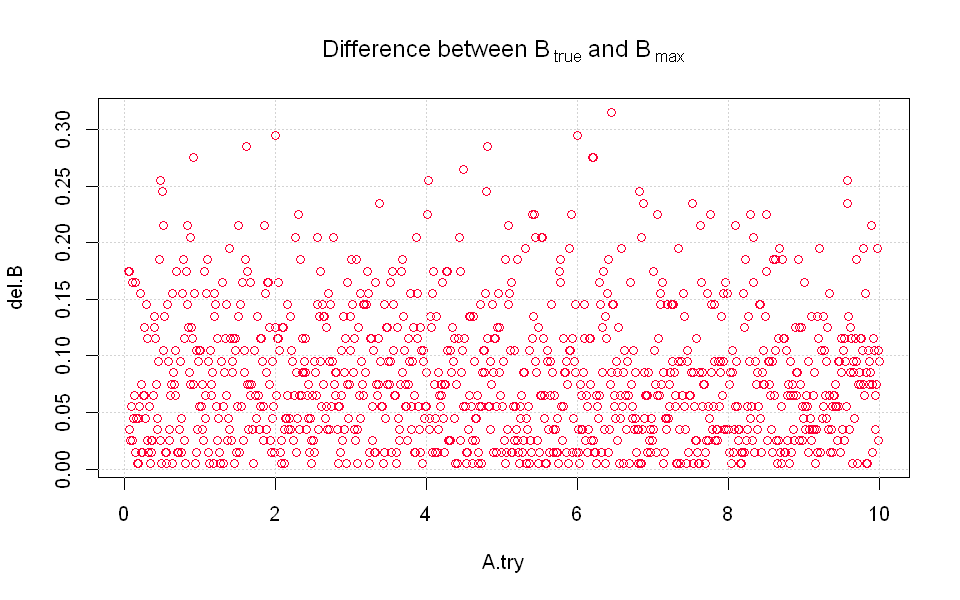

In [30]:
plot(A.try,del.B,col='#FF0035',main=expression(Difference ~between~B[~true]~and ~B[~max]))

grid()